## A Hands-on Workshop series in Machine Learning
### Session 4: More on Neural Networks
#### Instructor: Aashita Kesarwani

What is Deep Learning?

Why the sudden growth in the applications of Deep Learning?   
1. Data availability
2. Computing power 

<img src="https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub." width="600" height="850" />



#### Revision:

Let us summarize what we have learned so far.

Terminology:
* Nodes
* Input layer
* Hidden layers
* Output layer
* Weights
* Bias
* Weighted sum $z_i$
* Activation functions $g_i$
* Sigmoid function (also known as logistic function)
* Activations $a_i$
* Cost function $J$
* Logloss function (also known as cross-entropy function)
* Gradient descent algorithm
* Forward propagation
* Backward propagation
* Iterations
* Epochs
* Learning rate $\alpha$ 
* Overfitting and underfitting
* Multi-layer Perceptron (MLP)
* Binary classification, positive and negative classes, decision boundary

<img src="https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" width="400" height="450" />
<p style="text-align: center;"> Multi-layer Perceptron </p>


The iterative training process in a nutshell: 
1. The weights are initialized.
2. For each input vector, the activations are propagated forward thru the network to give the final output. This is **forward propagation**.
3. This final output is compared with the target value to calculate the cost function.
4. The above cost is propagated backwards using gradients. This is called **backpropagation**. 
5. The weights are updated using the gradients calculated above.


Many common tasks for supervised machine learning can be formulated as:
- Classification
- Regression

We have studied some binary classification algorithms in the previous session, for which the output variable $y$ is one of the classes - 0 or 1 for the input data $X$ and the function $f$ gives the decision boundary. We will explore regression algorithm in today's session. 

### Classification with more than two classes

Suppose you want to use the texts written by 3 different authors to build a neural network that can predict which of those three authors have written an unclassified text.

This is a classification problem with three classes. The neural networks we have seen so far only has a single node in the output layer that gives the probability for the positive class for binary (two-class) classification.

For a multi-class (more than two classes) classification problem, the number of nodes in the output layer will be equal to the number of classes.

<img align="left" src="https://drive.google.com/uc?id=1J1JdmJqBOHSqBmEoj1WvYec2vatmIILa"  >

Each node will correspond to one of the classes and it will output the probability for that class.

For multiclass classification, we use softmax function instead of sigmoid for output layer and cross-entropy loss instead of log-loss for cost function. 

### Cross-entropy loss

For the binary classification, our label $y$ was simply taking binary integer values $0$ or $1$. For more than two classes, we use one-hot encoding. 

**One-hot encoding:**   
For $k$ classes, we use the k-dimensional vectors to represent each class where only one entry is 1 and others zero. For illustrion, let $k=3$

$$ y_1 = (1, 0, 0), \quad \quad \quad y_2 = (0, 1, 0), \quad \quad \quad y_3 = (0, 0, 1)$$


The **cross-entropy loss** for the $i^{th}$ sample is given by

$$ J^{(i)} = - \sum_{j=1}^k y^{(i)}_j \log(p^{(i)}_j)$$

The **average cross-entropy loss** across all samples is given by

$$ J = - \frac{1}{m} \sum_{i=1}^m \sum_{j=1}^k y^{(i)}_j \log(p^{(i)}_j)$$

where $y^{(i)}$ is the one-hot encoded label for the $i^{th}$ sample and $p^{(i)}_j$ is the probability of the $j^{th}$ class for the $i^{th}$ sample.  Note that the inner summation will only contain a single non-zero term.


Check that cross-entropy loss reduces to log loss for two classes.

### Softmax function
For a multi-class (more than two classes) problem, the number of nodes in the output layer are equal to the number of classes and we want the probabilities for each class to add up to $1$. One of the simple way to ensure this would be to divide the output for each node by the total sum of the outputs of all the nodes. This is called standard normalization.

$$ prob_i = \frac{z_i}{z_1 + \dots + z_n} $$

The preferred method for multi-class  classification problems is to use softmax function in the output layer. It converts the outputs, say $z_i$'s, into probabilities adding to $1$, by performing standard normalization on the exponentials of the outputs.

For each node, the softmax formula is

$$softmax(z_i) = \frac{e^{z_i}}{e^{z_1} + \dots + e^{z_n}} $$

$$ softmax([z_1, \dots, z_k]) = \left[\frac{e^{z_1}}{e^{z_1}+ \dots + e^{z_k}}, \dots, \frac{e^{z_k}}{e^{z_1}+ \dots + e^{z_k}}\right]$$

The exponentials in the softmax cancels the log in the cross-entropy loss/cost function defined above, causing loss to be linear in $z_i$ and thus, speeding up the backpropagation step.

The only assumption for softmax is that the examples cannot belong to two classes at the same time.

What do you get for softmax when there are only two classes? Convince yourself that softmax is an extension of sigmoid function for multi-class.

### Regression:   
- Fitting a curve to determine the impact of feature variables on the target variable.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" height="350" />
<p style="text-align: center;"> Regression curve </p> 

Linear Regression: Fitting a ***line*** to determine the impact of feature variables on the target variable.

<img align="center" src="https://drive.google.com/uc?id=1DRuci3HIlZMBGfYkYSNpgUh_48gmjesl" width=400 />

Note that $X$ consists of independent variables, whereas $y$ target ouput and we want to approximate a function $f: X \to y$

For example, let $x$ be the square feet area of the house and $y$ be the selling price of the house.

**Can we use a Multi-Layer Perceptron network to be used for regression? If yes, what will change as compared to the previous one used for binary classification?**

<img align="center" src="https://drive.google.com/uc?id=1wMVjwS3AsJCfkh-iuIq4MEycUV9yqKuD" width=400 />

* Which one of the above two lines is a better fit? Red or Green?
* Can there be an even better fit? How do we find out?
* What precisely are we looking for in the line that is the best fit?

Answer: We are trying to minimize the error in predictions given by the line vs the actual target value.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png" width="300" height="300" />

The simple linear regression (linear regression with one variable) is formulated as $ y_{pred} = w * x + b $.

Finding the best fit line simply means ***finding the optimal values for $w$ and $b$***. For that, we need to quantify the cost function (also known as the error function or the loss function) that we can minimize. 

* How do we formulate the cost function?
* Should we sum up the errors? If not, why?

The simple linear regression model uses the mean-squared error (MSE) as the cost function. We square the errors and then take their average.

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})^2 $$

Alternatively, we can use Mean-absolute Error (MSE) as the cost function for regression:
$$ J = \frac{1}{n} \sum_{i=1}^n |y^{(i)} - y_{pred}^{(i)}| $$


The cost function is inherently a function of the slope and intercept. This is evident once we substitute $y_{pred}$ with the regression line.

$$ J(w, b) = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - (w * x^{(i)} + b) )^2 $$

The [gradient descent algorithm](https://machinelearningmastery.com/gradient-descent-for-machine-learning/), introduced in the last session, can then be used to minimize the above cost function by updating the weights iteratively. 

Revision: How does the gradient descent algorithm work?
* We start with some weights initially
* Let the model make prediction $y_{pred}$ for a training example $x$
* Compute the cost using the prediction $y_{pred}$ and the actual target $y$ 
* Compute the gradient of the cost and use it to update the weights
* Repeat the above steps for another training example

The weights are updated in the direction of the steepest descent of the cost function in each iteration. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.
<img align="center"  src="https://drive.google.com/uc?id=1K1Ki-VizvgPK88QKCQapedHItBQd8WHr" width="450" height="200" />
<p style="text-align: center;"> Minimizing the cost function using gradient descent </p> 

To derive the formula for updating weights using gradient descent, we first take the partial derivative, 
$$ \frac{\partial J}{\partial w} = - \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
And substitute it in the above equation to get
$$ w := w + \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   \ x^{(i)} $$
Similarly,
$$ b := b + \alpha \frac{1}{n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})   $$

To summarize, *we defined a cost function to quantify the error in predicting outputs and then we update the weights so as to minimize the cost in the fastest way with the help of gradient descent algorithm*.

**An illustrative example:**
We use a pre-processed sample from the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) to predict the house prices based on the number of rooms.
* **Input** $x$: Number of rooms
* **Target** $y$: Median value of owner-occupied homes

<img align="center" src="https://drive.google.com/uc?id=1Klx9fs2cAeyHA860s-Nxw9iQVMWjV0cP" width=400 />

In the other notebook titled *Linear regression implementation using gradient descent*, the above gradient descent algorithm is implemented so that the regression line is being updated iteratively and the cost is declining with every iteration.
<img align="center" src="https://drive.google.com/uc?id=1MjPa-pioGFZ_Wpz38qzYbBlVpDdg1p0P" width=700 />
<img align="center" src="https://drive.google.com/uc?id=1QWTVQxzgLL0oqYNcjz1j44JZGKGoS37S" width=500 />

**Exercise**: If you were to implement the above algorithm, what major functions would you need to implement? What would the code look like for the iterative process of weight updates?

You can use [scikit-learn](https://scikit-learn.org/stable/) implementation of the linear regression as demonstrated below while working on problems. The linear regression is often good as a baseline model, and this implementation is fast and require very little code. 

First we import the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and then initialize the regressor.

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Then we train the regressor using the [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method on the data points.

In [11]:
X = x.reshape(-1, 1)
lin_reg.fit(X, y)

LinearRegression()

Next, we plot the regression line using the functions written in the python file `linreg.py`. 

In [16]:
def cost(x, y, w, b, n):
    J = 1/(2*n) * np.sum((y - (w*x + b))**2)
    return J

w = lin_reg.coef_[0]
b = lin_reg.intercept_
print("Weight:", w)
print("Intercept", b)
print("Cost:", cost(x, y, w, b, n))

Weight: 9.559377910614938
Intercept -38.406936727358584
Cost: 13.165639342962304


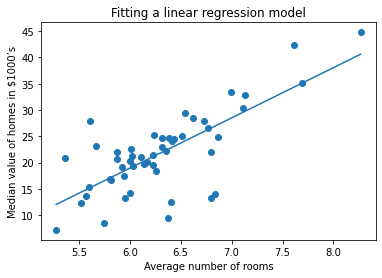

In [17]:
# Plot the points
plt.scatter(x, y)
# Plot the regression line
x_values = np.linspace(x.min(), x.max(), 100)
y_prediction = w*x_values + b
plt.plot(x_values, y_prediction);
plt.xlabel("Average number of rooms");
plt.ylabel("Median value of homes in $1000’s");
plt.title("Fitting a linear regression model");

#### Multivariate Linear Regression
The same formulation and understanding can be extended to linear regression with more than one variable, say $x_1, x_2, \dots, x_n$, with the equation 

$$ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$$ 

And we estimate the weights $w_1, w_2, \dots, w_n$ corresponding to each variable as well as the intercept.

&nbsp;

&nbsp;

Linear regression is the simplest example of a neural network with no hidden layers.

<img src="https://qph.fs.quoracdn.net/main-qimg-6f8c9994c154097ada51aa9e113e6515" width="450">

Notes:
* Increasing the weight for a variable means it is becoming more impactful in the prediction. 
* The weights for two variables cannot be compared straightway unless they are in same scale or are normalized to be in the same scale.

#### Multivariate regression

Linear regression might not work for many datasets, how can we use neural network for curve fitting in general? We can add hidden layers to add complexity/non-linearity to the function that is approximated by the network. Remember, you would not want to use sigmoid, unit step, etc. as activation function for the output layer for regression in general.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" height="350" />
<p style="text-align: center;"> Regression curve </p> 


### Gradient descent optimizers

* **Stochastic gradient descent**: A single training example is used in each iteration. The gradient (or the derivative of the cost function) is computed for that training example and it is used to update the weights.
* **Batch gradient descent**: The entire training set is used in each iteration. The average of the gradients for all the training examples is computed and it is used to update the weights.

Notes:
* The stochastic converges much faster for larger datasets than the batch gradient descent since the weights are updated a lot more frequently.
* For batch gradient descent, the cost function declines consistently with each iteration, whereas for the stochastic gradient descent, the cost fluctuates and declines overall after each epoch.
* The stochastic gradient descent cannot make use of the vectorized operations unlike batch gradient descent.


**Mini-batch gradient descent** is a mix of the above two and a good compromise. The training set is divided into batches and a single batch is used in each iteration.  The batch sizes of 32, 64 and 128 are often used.

In practice, mini-batch is most commonly used, especially for the large datasets. 

<img src="https://miro.medium.com/max/1634/1*PV-fcUsNlD9EgTIc61h-Ig.png" width=600 />


### Tuning the learning rate 

The learning rate ($\alpha$), that determines the size of the steps in the gradient descent algorithm, is an important hyperparameter that needs to be tuned. 
* If the learning rate is too low, then it takes too long to converge. 
* If the learning rate is too high, then it might oscillate and never reach the minima.

$$ w := w - \alpha \frac{\partial J}{\partial w}$$

<img src="https://miro.medium.com/max/1400/1*9zqj3nwIEU-L0-9pYitcRA.png" width=600 />

Our intuition tells us that the learning rate $\alpha$ should be larger at the beginning when are weights are initialized randomly and are far from being optimal and then it can be reduced as the training process proceeds.This is called learning rate schedule or learning rate decay. The two common methods used are linear decay or exponential decay.
 

<img src="https://cs231n.github.io/assets/nn3/learningrates.jpeg" width=300 />


The tuning of the learning rate has been an area of research and the adaptive gradient descent algorithms such as Adam, RMSprop, AdaGrad, etc. are developed that usually give better results.

### Tuning the number of epochs

It is helpful to keep a check on both training and validation errors by printing them out at regular intervals and stop the training process at a suitable time to avoid both underfitting and overfitting to the training set.

<img src="http://fouryears.eu/wp-content/uploads/2017/12/early_stopping.png" width=400 />


#### How to address overfitting?
- Reduce the number of features 
    - Discard some features
    - Dimensionality reduction techniques such PCA, LDA, etc.
- Simplify the model (by tuning hyperparameters)
- Reducing the number of epochs for training the network
- Regularization, Dropout, etc.
- Adding more training examples, if possible  
<img src="https://i.stack.imgur.com/rpqa6.jpg" width="450" height="600" />

In a nutshell, 
* **To reduce overfitting, reduce complexity.**
* **To reduce underfitting, increase complexity.**

We will learn the above concepts in more detail in the next session.

#### Check out [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=10&networkShape=4,2&seed=0.93390&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)!!